In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import time
import glob
%matplotlib inline

In [3]:
ca_vid_data = pd.read_csv('data\CAvideos.csv')

In [4]:
with open('data\ids.json') as f:
    vid_categories = json.load(f)['items']

In [5]:
category_name = {}
for category in vid_categories:
    category_name[int(category['id'])] = category['snippet']['title']
ca_vid_data['category_name'] = ca_vid_data['category_id'].map(category_name)

In [6]:
print(category_name)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [7]:
ca_vid_data['description'].fillna(value='None',inplace=True)

In [8]:
ca_vid_data['publish_time'] = pd.to_datetime(ca_vid_data['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:
ca_vid_data['publish_month'] = ca_vid_data['publish_time'].dt.month

In [10]:
ca_vid_data['trending_date'] = pd.to_datetime(ca_vid_data['trending_date'],format = '%y.%d.%m')
ca_vid_data['trending_month'] = ca_vid_data['trending_date'].dt.month

In [13]:
like_percent = pd.DataFrame((ca_vid_data['likes'] / ca_vid_data['views']) * 100)
dislike_percent = pd.DataFrame((ca_vid_data['dislikes'] / ca_vid_data['views']) * 100)
ca_vid_data['like_percent'] = like_percent
ca_vid_data['dislike_percent'] = dislike_percent

In [14]:
ca_vid_data['positive_or_negative'] = ca_vid_data['like_percent'] > ca_vid_data['dislike_percent']

In [15]:
# comparing the likes to dislikes 
pos_neg_list = []
for _ in ca_vid_data['positive_or_negative']:
    if _ == True:
        pos_neg_list.append(1)
    else:
        pos_neg_list.append(0)

In [16]:
ca_vid_data['positive_or_negative'] = pos_neg_list

In [18]:
ca_vid_data = ca_vid_data[['video_id','trending_date','trending_month','title','channel_title',
        'category_id','category_name','publish_time','publish_month','views','positive_or_negative',
        'likes','like_percent','dislikes','dislike_percent','comment_count','thumbnail_link','comments_disabled',
        'ratings_disabled','video_error_or_removed','description']]

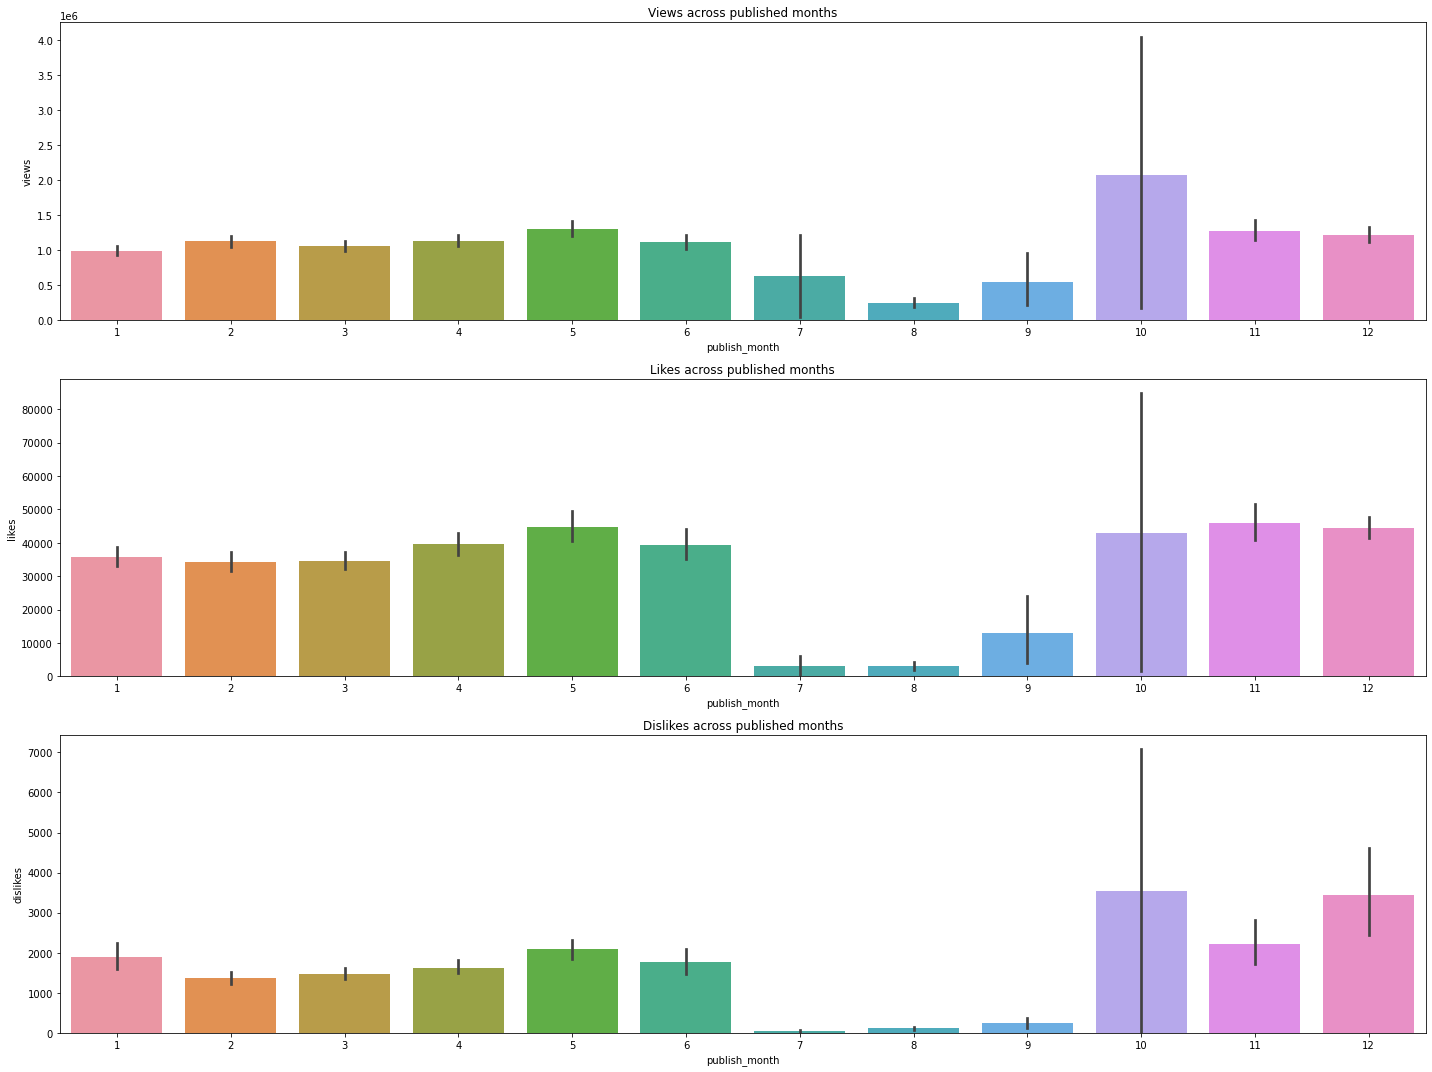

In [20]:
f, ax = plt.subplots(3,1,figsize=(20,15))
g = sns.barplot(x=ca_vid_data['publish_month'],y=ca_vid_data['views'],data=ca_vid_data,ax=ax[0])
g.set_title('Views across published months')
g1 = sns.barplot(x=ca_vid_data['publish_month'],y=ca_vid_data['likes'],data=ca_vid_data,ax=ax[1])
g1.set_title('Likes across published months')
g2 = sns.barplot(x=ca_vid_data['publish_month'],y=ca_vid_data['dislikes'],data=ca_vid_data,ax=ax[2])
g2.set_title('Dislikes across published months')
plt.tight_layout()

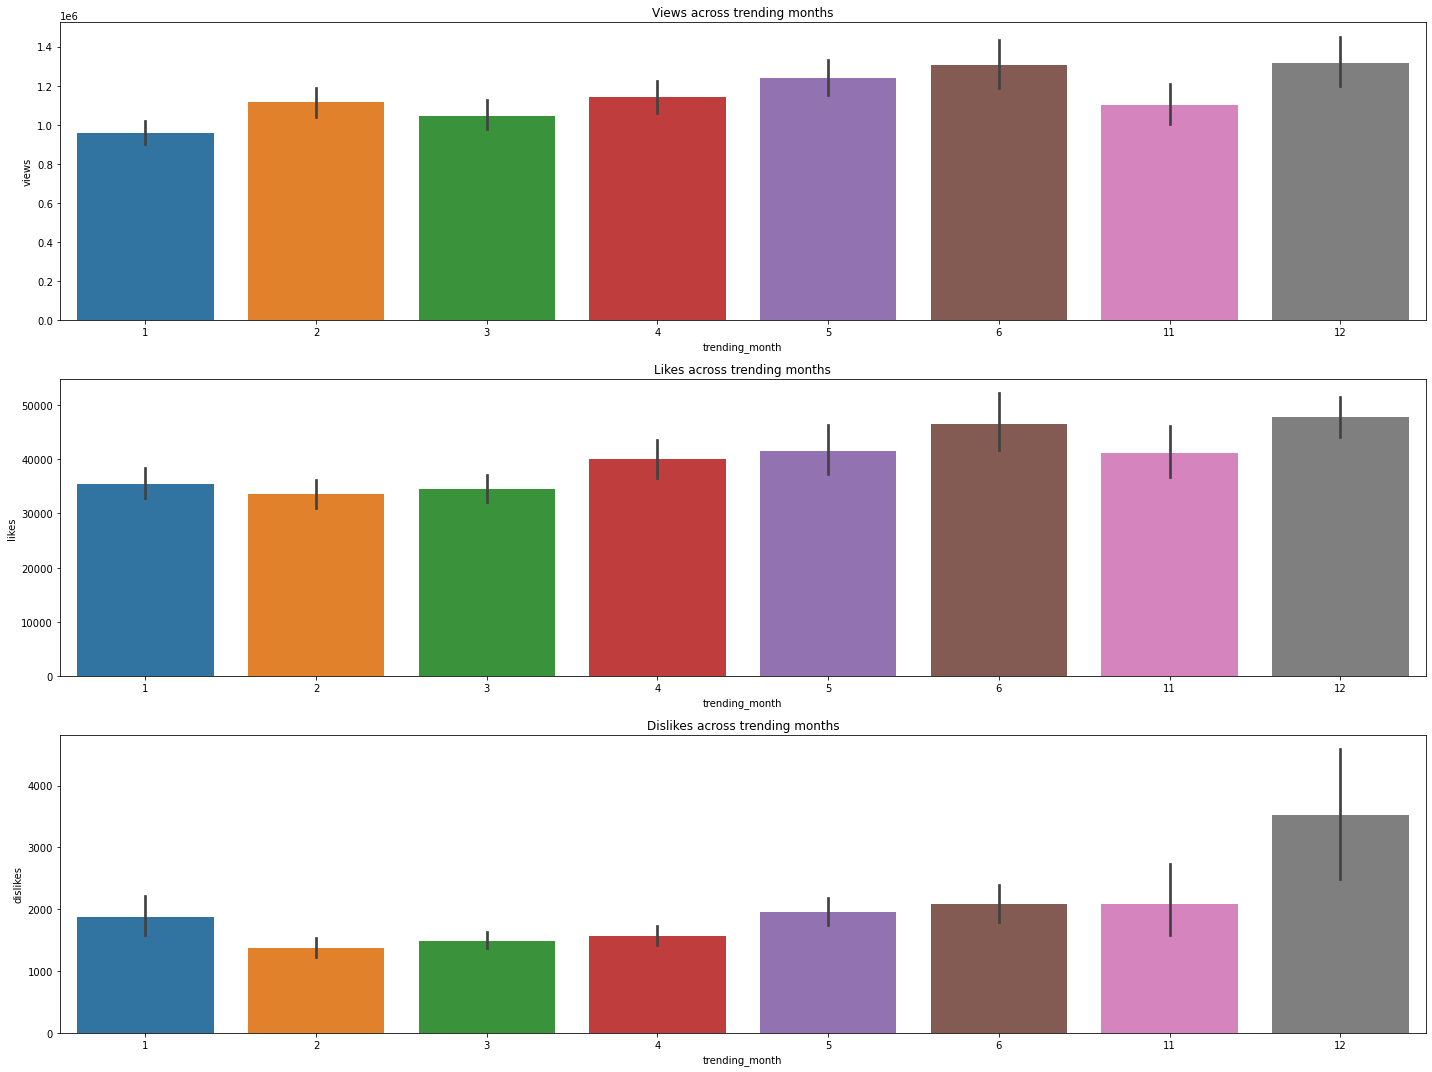

In [21]:
f, ax = plt.subplots(3,1,figsize=(20,15))
g = sns.barplot(x=ca_vid_data['trending_month'],y=ca_vid_data['views'],data=ca_vid_data,ax=ax[0])
g.set_title('Views across trending months')
g1 = sns.barplot(x=ca_vid_data['trending_month'],y=ca_vid_data['likes'],data=ca_vid_data,ax=ax[1])
g1.set_title('Likes across trending months')
g2 = sns.barplot(x=ca_vid_data['trending_month'],y=ca_vid_data['dislikes'],data=ca_vid_data,ax=ax[2])
g2.set_title('Dislikes across trending months')
plt.tight_layout()

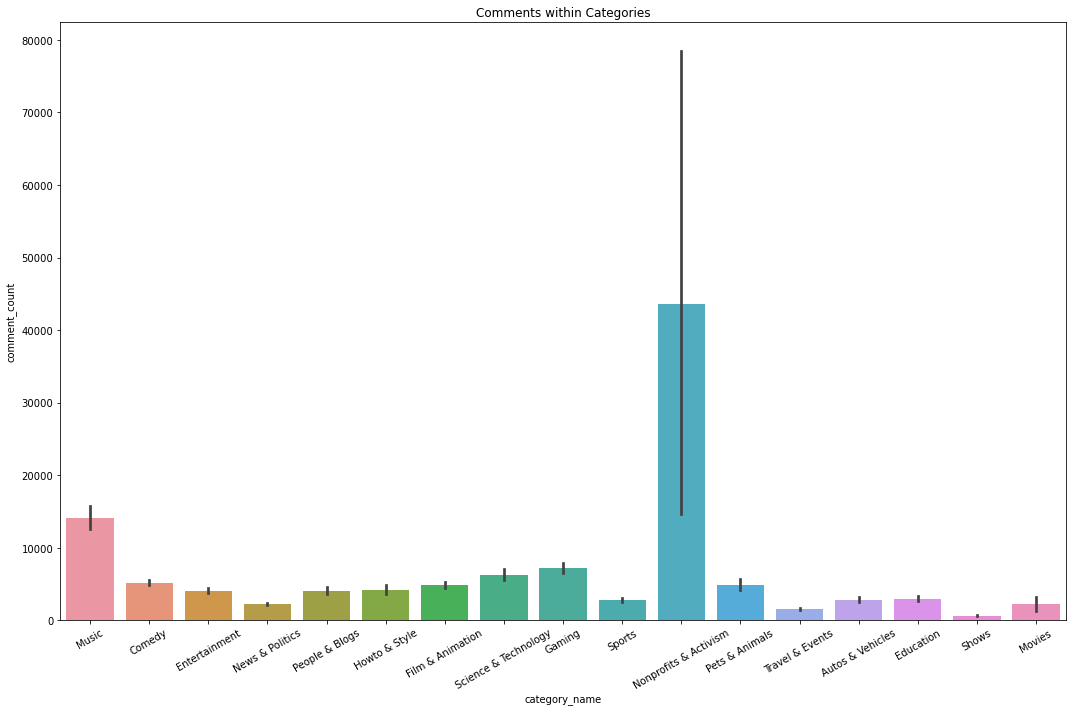

In [22]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=ca_vid_data['category_name'],y=ca_vid_data['comment_count'],data=ca_vid_data)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Comments within Categories')
plt.tight_layout()
# it looks like non profits seem to have the most 'comment' activities

In [23]:
corr_list = ca_vid_data[['views','likes','dislikes','comment_count']]

(4.5, -0.5)

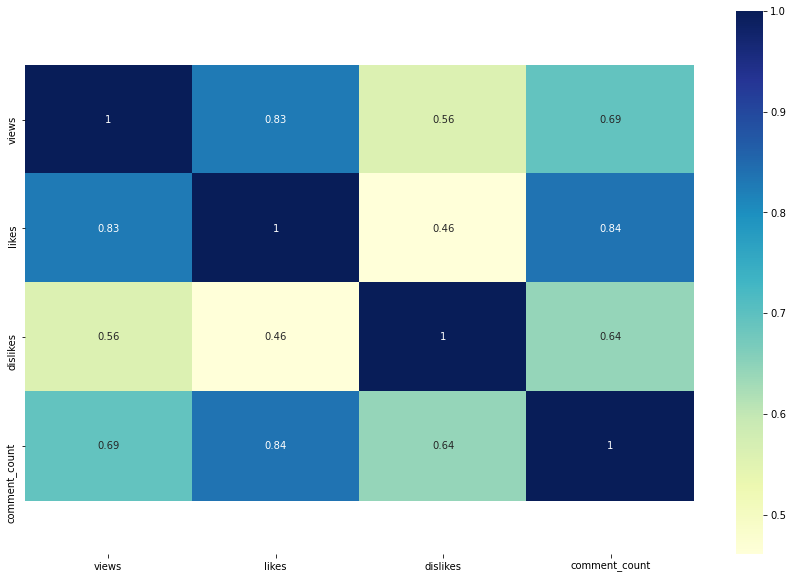

In [24]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=corr_list.corr(),cmap='YlGnBu',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Correlation of Likes and Dislikes')

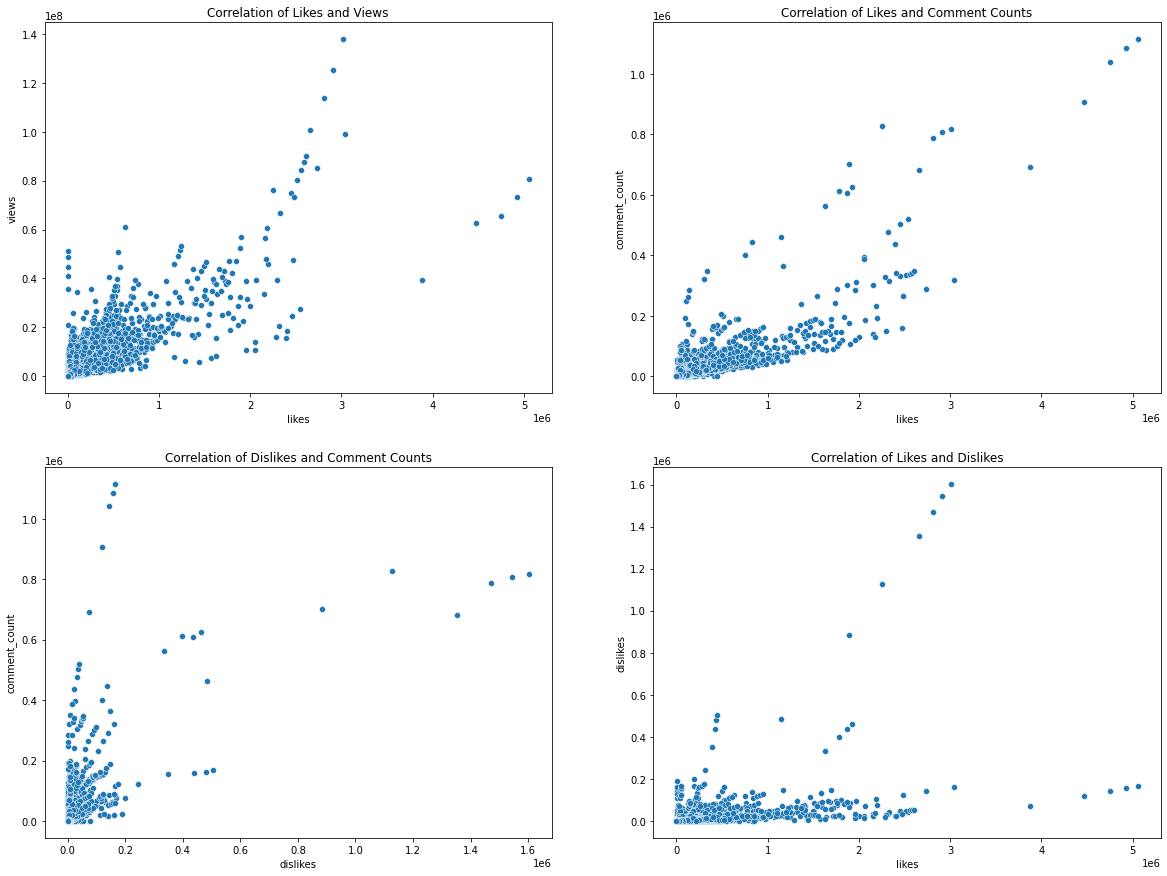

In [25]:
f, ax = plt.subplots(2,2,figsize=(20,15))
# 1st chart (likes : views)
g = sns.scatterplot(x=ca_vid_data['likes'],y=ca_vid_data['views'],data=ca_vid_data,ax=ax[0][0])
g.set_title('Correlation of Likes and Views')
# 2nd chart (likes : communt_count)
g1 = sns.scatterplot(x=ca_vid_data['likes'],y=ca_vid_data['comment_count'],data=ca_vid_data,ax=ax[0][1])
g1.set_title('Correlation of Likes and Comment Counts')
# 3rd chart (comment_count : dislikes)
g2 = sns.scatterplot(x=ca_vid_data['dislikes'],y=ca_vid_data['comment_count'],data=ca_vid_data,ax=ax[1][0])
g2.set_title('Correlation of Dislikes and Comment Counts')
# 4th chart (likes : dislikes)
g3 = sns.scatterplot(x=ca_vid_data['likes'],y=ca_vid_data['dislikes'],data=ca_vid_data,ax=ax[1][1])
g3.set_title('Correlation of Likes and Dislikes')

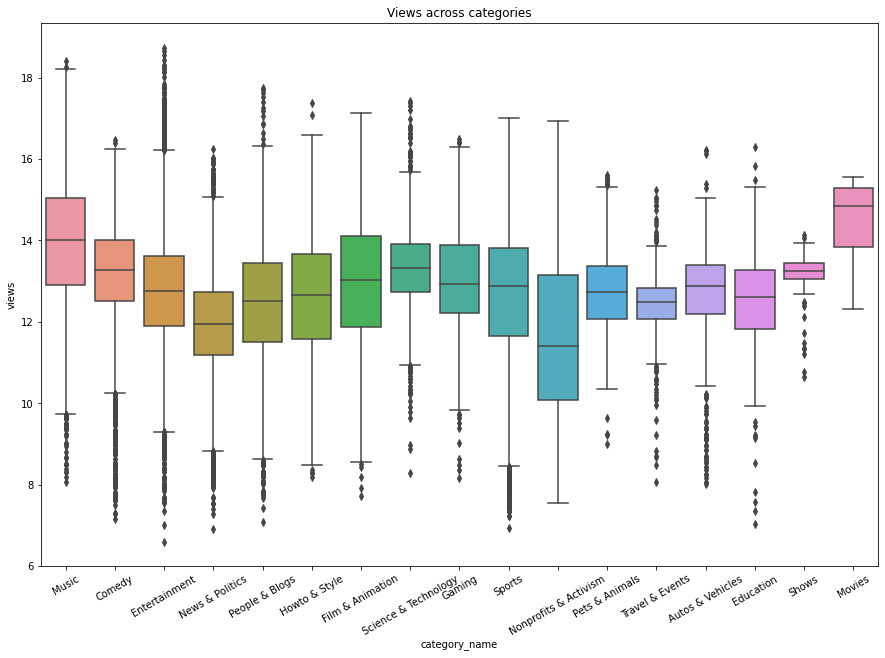

In [26]:
plt.figure(figsize=(15,10))
g = sns.boxplot(x=ca_vid_data['category_name'],y=np.log(ca_vid_data['views']),data=ca_vid_data)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Views across categories')
plt.show()

C:\Users\vital\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Amount of views by Month')

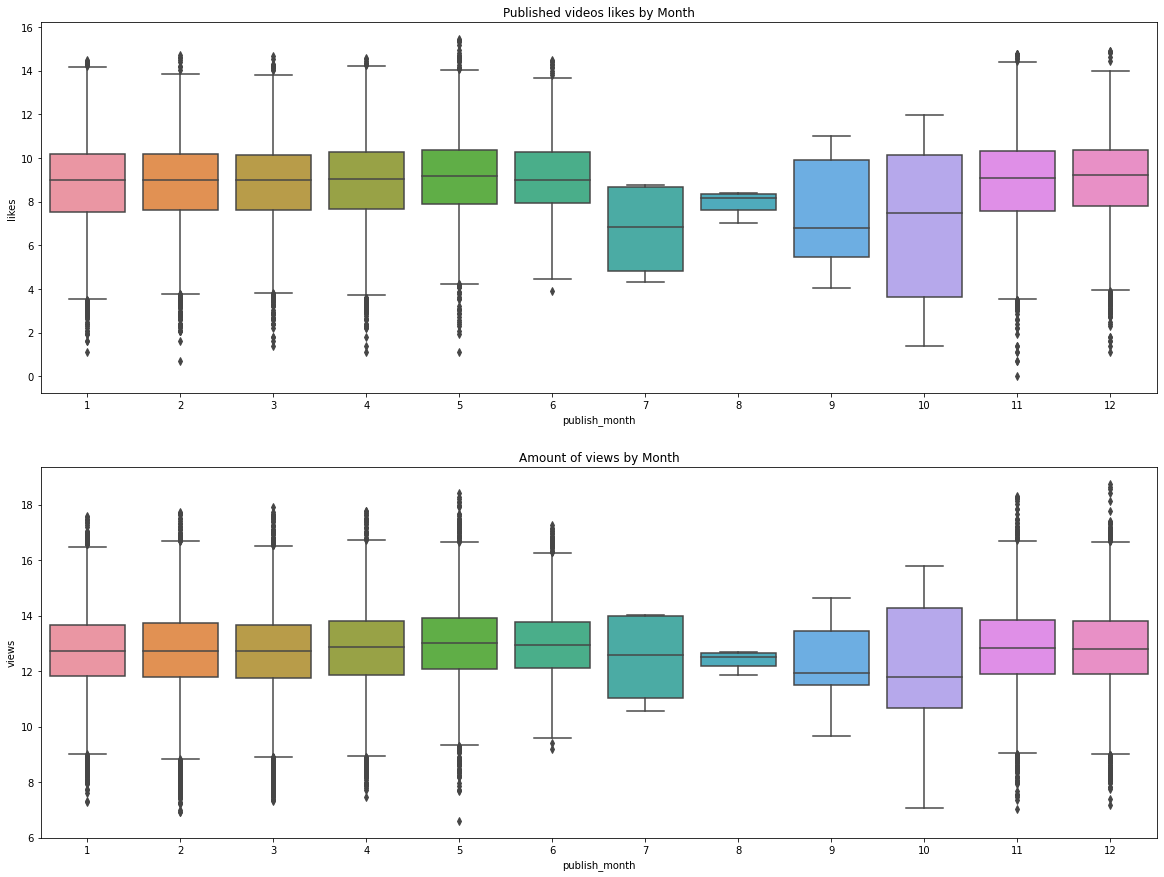

In [32]:
f, ax = plt.subplots(2,1,figsize=(20,15))
g = sns.boxplot(x=ca_vid_data['publish_month'],y=np.log(ca_vid_data['likes']),data=ca_vid_data,ax=ax[0])
g.set_title('Published videos likes by Month')
g1 = sns.boxplot(x=ca_vid_data['publish_month'],y=np.log(ca_vid_data['views']),data=ca_vid_data,ax=ax[1])
g1.set_title('Amount of views by Month')

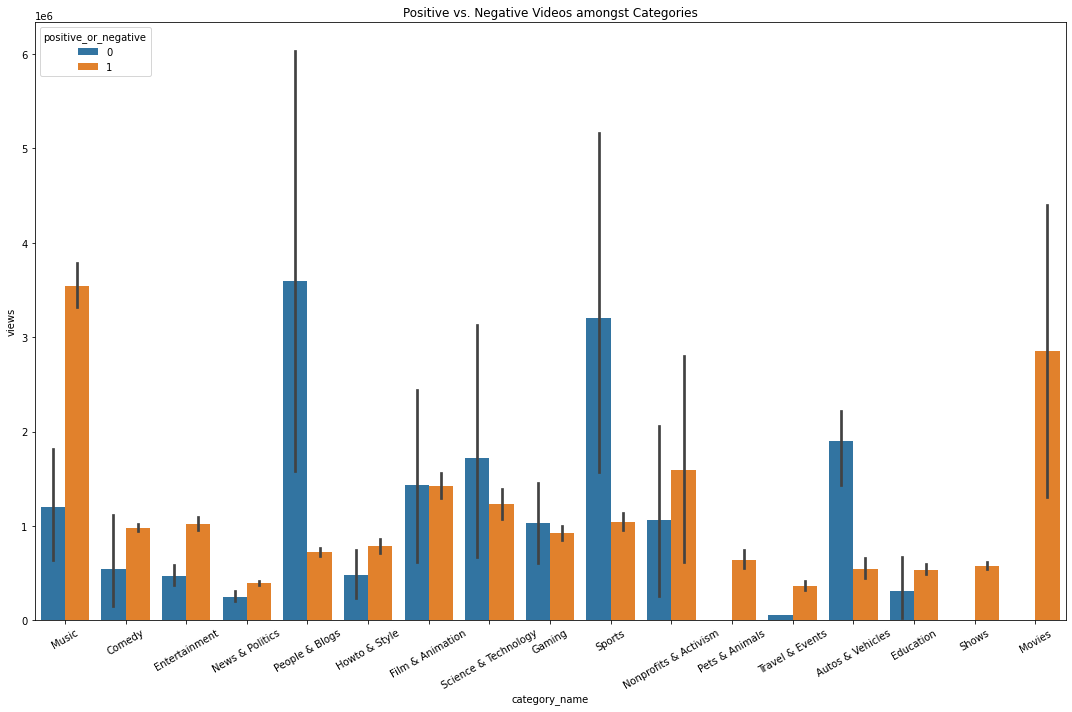

In [29]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=ca_vid_data['category_name'],y=ca_vid_data['views'],hue=ca_vid_data['positive_or_negative'],data=ca_vid_data)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Positive vs. Negative Videos amongst Categories')
plt.tight_layout()

In [30]:
ca_vid_data[['hours','minutes','seconds']] = ca_vid_data['publish_time'].dt.time.astype(str).str.split(':', expand=True)

C:\Users\vital\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of views by Hour')

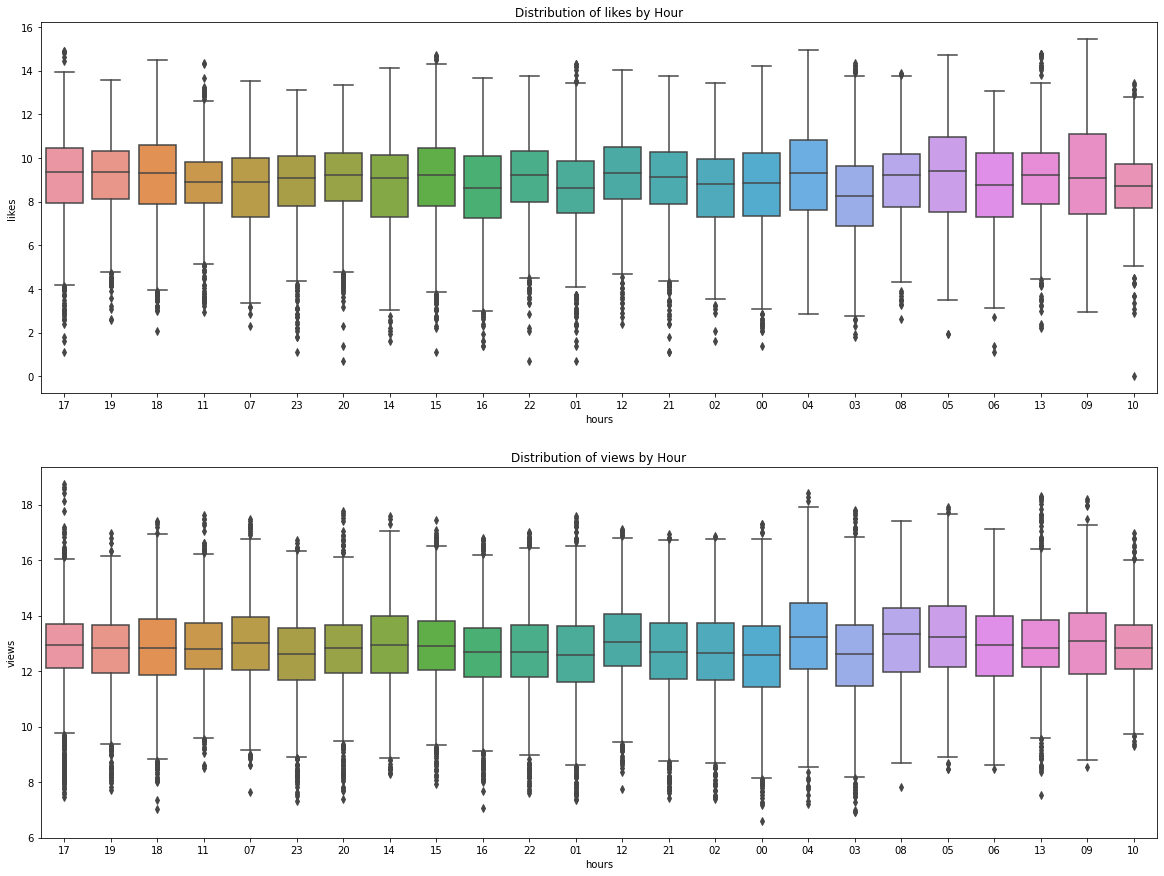

In [31]:
f, ax = plt.subplots(2,1,figsize=(20,15))
g = sns.boxplot(x=(ca_vid_data['hours']),y=np.log(ca_vid_data['likes']),data=ca_vid_data,ax=ax[0])
g.set_title('Distribution of likes by Hour')
g1 = sns.boxplot(x=ca_vid_data['hours'],y=np.log(ca_vid_data['views']),data=ca_vid_data,ax=ax[1])
g1.set_title('Distribution of views by Hour')